In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('googleplaystore.csv')

In [4]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
data.shape

(10841, 13)

In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
total=data.isnull().sum().sort_values(ascending=False)
percent = data.isnull().sum()/data.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [8]:
missing_data.head()

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092


Veri kümesinde (DataFrame'de) eksik veri (NaN) içeren satırları siler.



In [9]:
data.dropna(how='any',inplace=True)

In [10]:
data.shape

(9360, 13)

In [11]:
total=data.isnull().sum().sort_values(ascending=False)
percent = data.isnull().sum()/data.isnull().count().sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])

In [13]:
missing_data.head(5)

,Total,Percent
App,0,0.0
Category,0,0.0
Rating,0,0.0
Reviews,0,0.0
Size,0,0.0


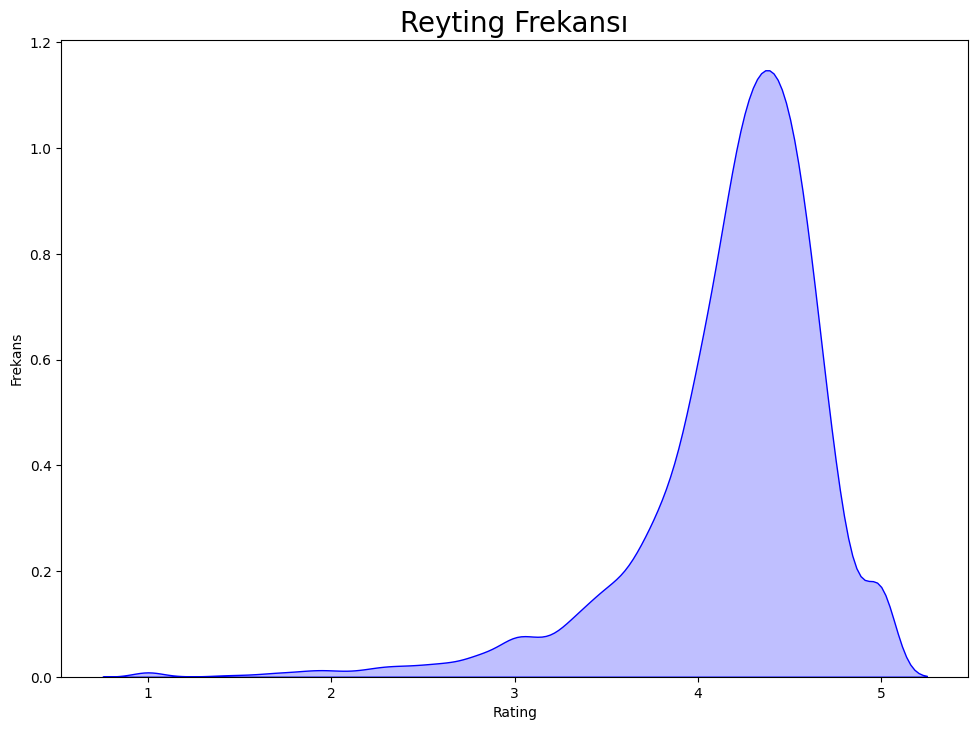

In [16]:
plt.rcParams['figure.figsize']=11.7,8.27
g=sns.kdeplot(data.Rating,color="Blue",shade=True)
g.set_xlabel("Rating")
g.set_ylabel("Frekans")
plt.title("Reyting Frekansı",size=20)
plt.show()

In [17]:
print(len(data['Category'].unique()),'category')

33 category


In [18]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

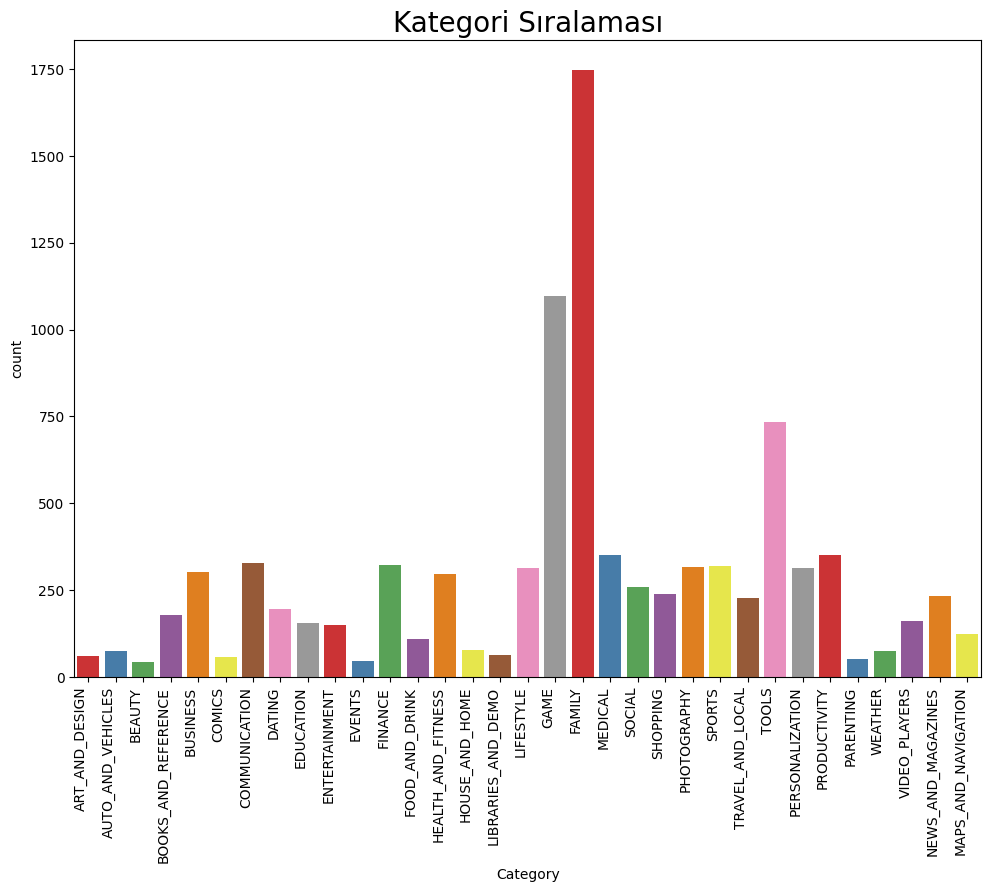

In [20]:
g=sns.countplot(x='Category',data=data,palette='Set1')
g.set_xticklabels(g.get_xticklabels(),rotation=90,ha='right')
plt.title('Kategori Sıralaması',size=20)
plt.show()

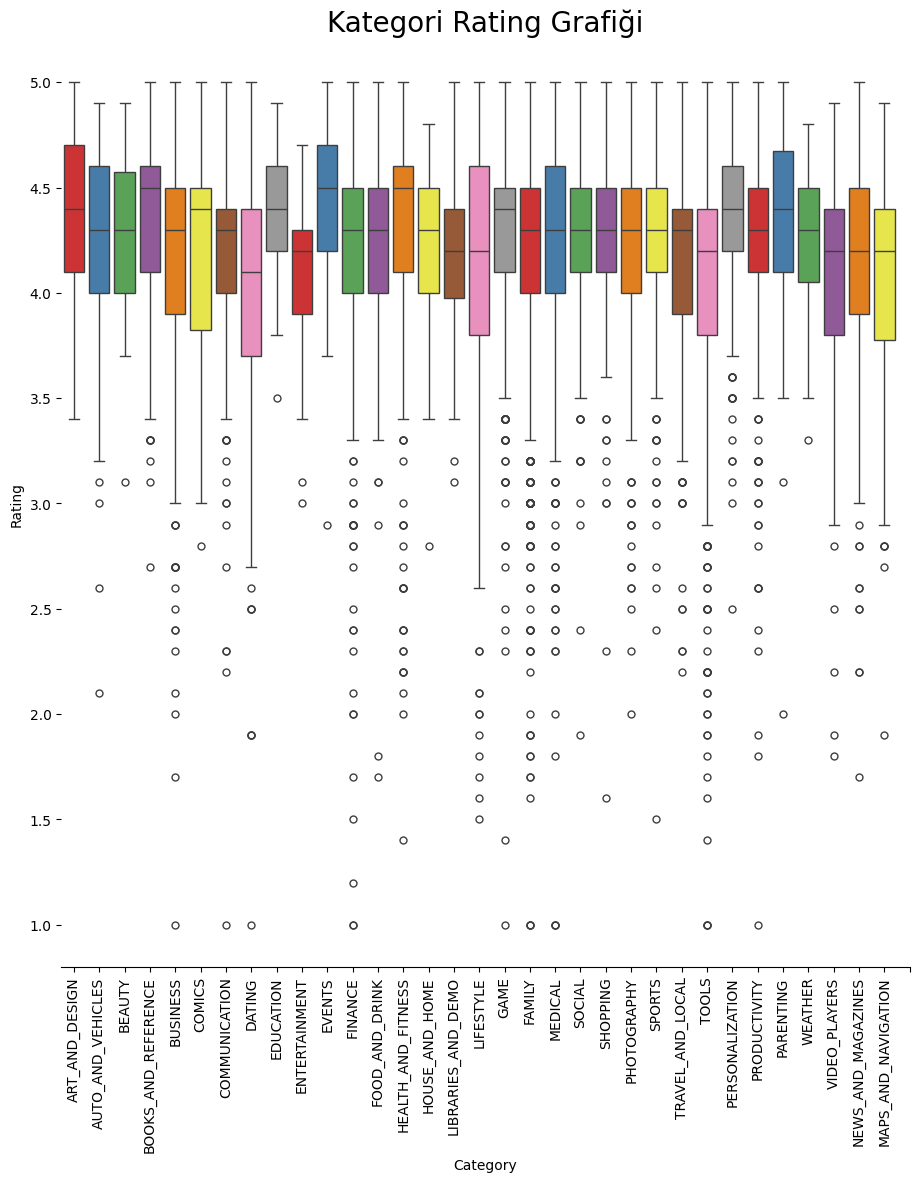

In [25]:
g=sns.catplot(x='Category',y='Rating',data=data,kind='box',height=10,palette='Set1')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g= g.set_ylabels("Rating")
plt.title("Kategori Rating Grafiği",size=20)
plt.show()


In [26]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [27]:
data['Reviews']=data['Reviews'].apply(lambda x:int(x))

In [28]:
data['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

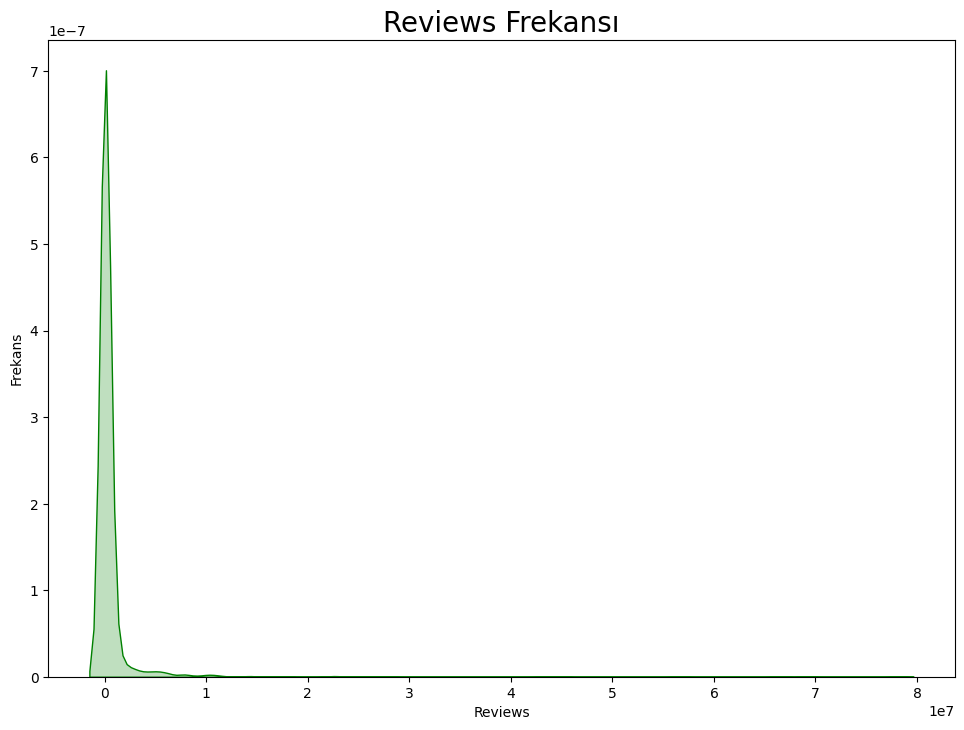

In [29]:
plt.rcParams['figure.figsize']=11.7,8.27
g=sns.kdeplot(data.Reviews,color="Green",shade=True)
g.set_xlabel("Reviews")
g.set_ylabel("Frekans")
plt.title("Reviews Frekansı",size=20)
plt.show()

In [30]:
data[data.Reviews>5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


In [31]:
len(data[data.Reviews>5000000])

230

<Figure size 1000x1000 with 0 Axes>

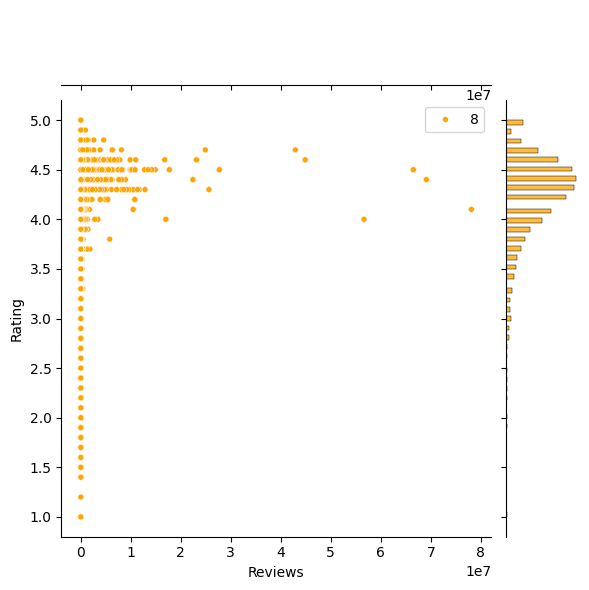

In [33]:
plt.figure(figsize=(10,10))
g=sns.jointplot(x='Reviews',y='Rating',color='orange',data=data,size=8)

Text(0.5, 1.0, 'Rating Reviews')

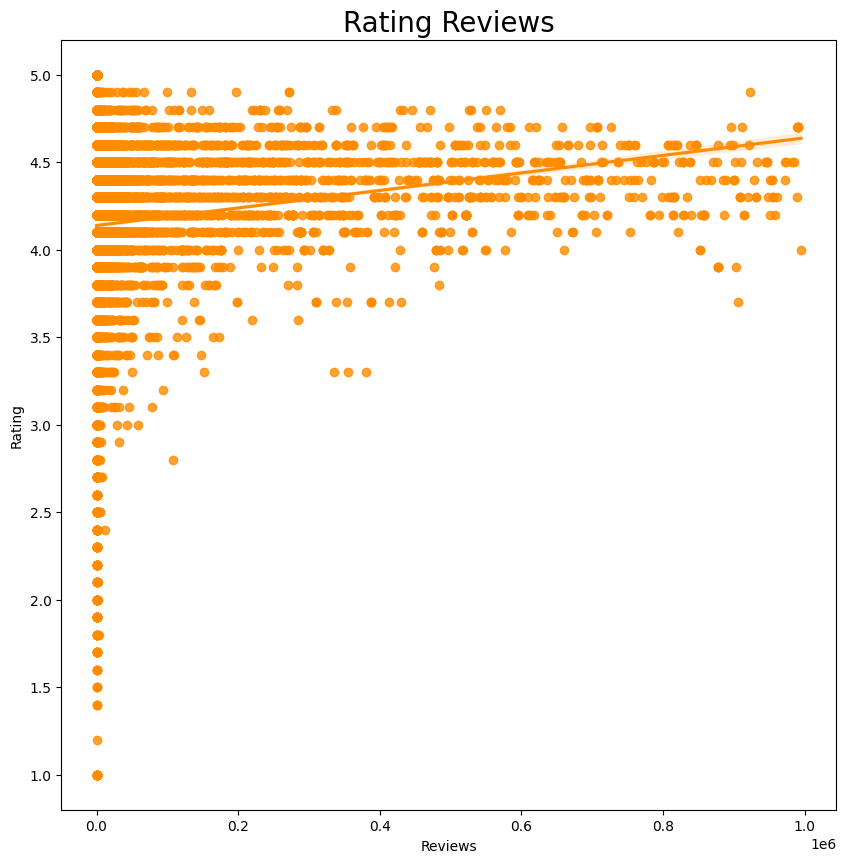

In [34]:
plt.figure(figsize=(10,10))
g=sns.regplot(x='Reviews',y='Rating', color='darkorange',data=data[data['Reviews']<1000000]);
plt.title('Rating Reviews',size=20)

In [35]:
data['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [36]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [37]:
len(data[data.Size=='Varies with device'])

1637

In [38]:
data['Size'].replace('Varies with device',np.nan,inplace=True)

In [39]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', nan, '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M', '3.7M',
       '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M', '3.0M',
       '7.2M', 

In [43]:
data.Size=(data.Size.replace(r'[kM]+','', regex=True).astype(float)*\
          data.Size.str.extract(r'[\d]+([KM]+)',expand=False)
           .fillna(1)
           .replace(['k','M'],[10**3,10**6]).astype(int))

In [44]:
data["Size"].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 5.50e+06, 1.70e+07, 3.90e+07, 3.10e+07,
       4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06, 9.20e+06,
       5.20e+06, 1.10e+07, 2.40e+07,      nan, 9.40e+06, 1.50e+07,
       1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06, 7.90e+06, 5.60e+07,
       5.70e+07, 3.50e+07, 5.40e+07, 2.01e+02, 3.60e+06, 5.70e+06,
       8.60e+06, 2.40e+06, 2.70e+07, 2.70e+06, 2.50e+06, 7.00e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 2.20e+07, 6.40e+06, 3.20e+06, 8.20e+06, 4.90e+06,
       9.50e+06, 5.00e+06, 5.90e+06, 1.30e+07, 7.30e+07, 6.80e+06,
       3.50e+06, 4.00e+06, 2.30e+06, 2.10e+06, 4.20e+07, 9.10e+06,
       5.50e+07, 2.30e+01, 7.30e+06, 6.50e+06, 1.50e+06, 7.50e

In [46]:
data["Size"].fillna(data.groupby("Category")['Size'].transform('mean'),inplace=True)

<Figure size 1000x1000 with 0 Axes>

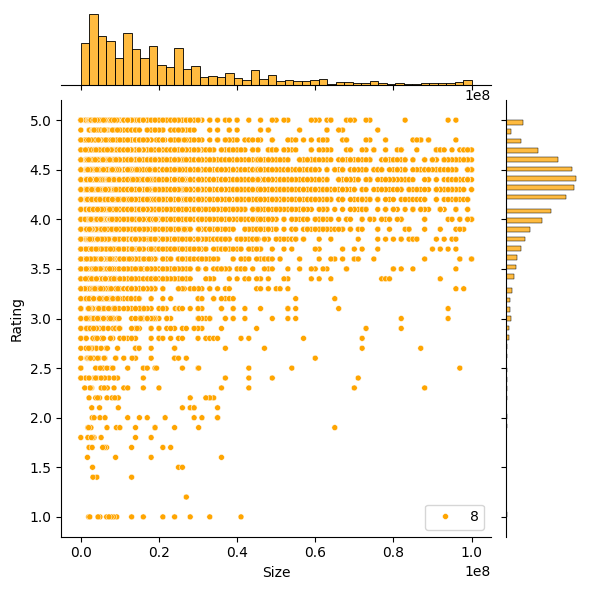

In [48]:
plt.figure(figsize=(10,10))
g=sns.jointplot(x='Size',y='Rating',data=data,color='orange',size=8)

In [49]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [50]:
data.Installs= data.Installs.apply(lambda x: x.replace(',',''))
data.Installs= data.Installs.apply(lambda x: x.replace('+',''))
data.Installs= data.Installs.apply(lambda x: int(x))

In [52]:
data["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [53]:
data["Installs"].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [54]:
sorted_value= sorted(list(data['Installs'].unique()))
sorted_value

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [55]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [56]:
data['Installs'].replace(sorted_value,range(0,len(sorted_value),1),inplace=True)

In [57]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Text(0.5, 1.0, 'Rating vs Installs')

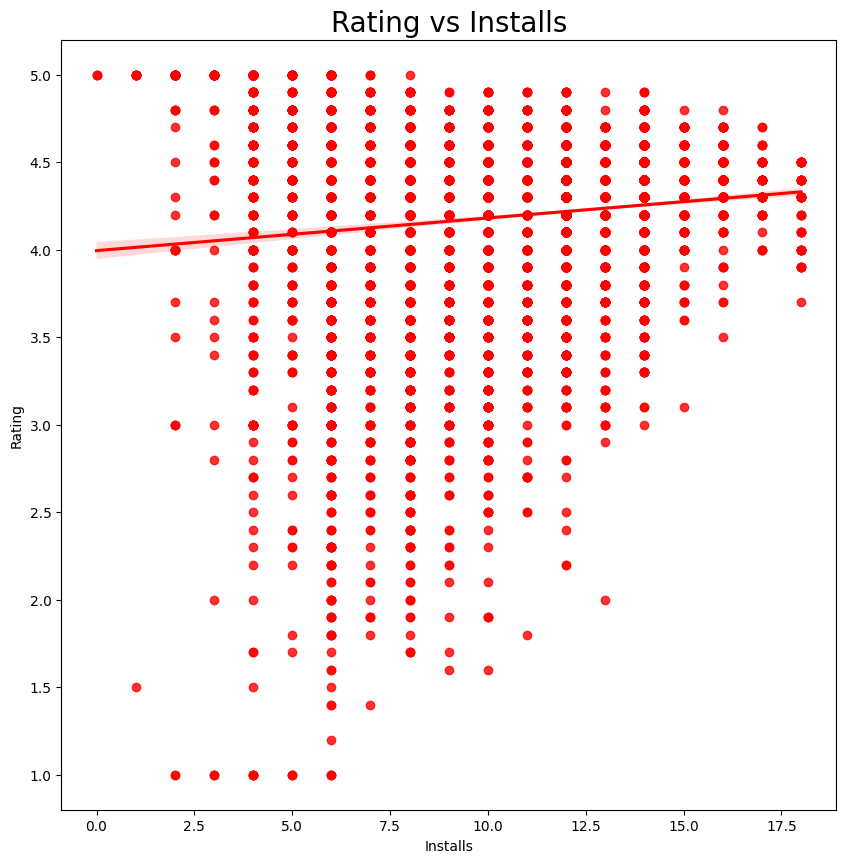

In [59]:
plt.figure(figsize=(10,10))
g=sns.regplot(x='Installs',y='Rating', color='red',data=data);
plt.title('Rating vs Installs',size=20)

In [60]:
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

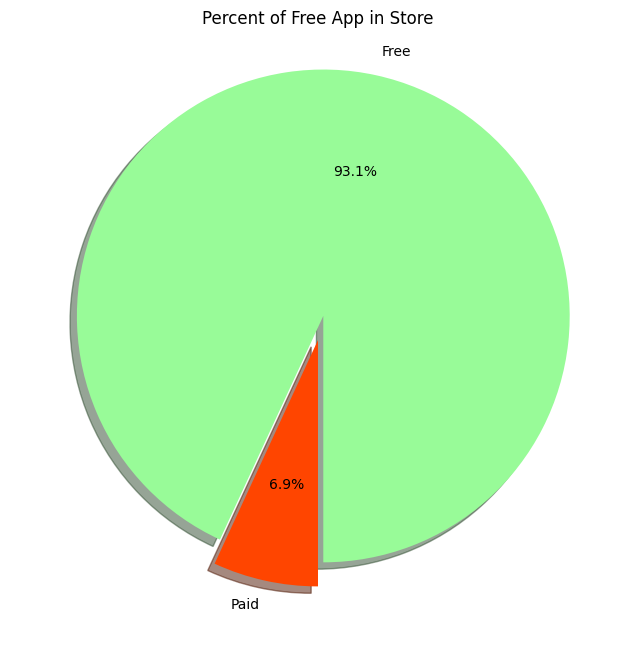

In [67]:
labels =data['Type'].value_counts(sort=True).index
sizes =data['Type'].value_counts(sort=True)

colors = ['palegreen','orangered']
explode = (0.1,0)

plt.rcParams['figure.figsize'] = 8,8

plt.pie(sizes,explode=explode,labels=labels,colors=colors,
       autopct='%1.1f%%',shadow=True,startangle=270,)

plt.title('Percent of Free App in Store')
plt.show()

In [68]:
data['Free']=data['Type'].map(lambda s:1  if s =='Free' else 0)
data.drop(['Type'],axis=1,inplace=True)

In [69]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [70]:
data['Free'].unique()

array([1, 0], dtype=int64)

In [72]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [73]:
data['Price'].value_counts().head(30)

Price
0          8715
$2.99       114
$0.99       106
$4.99        70
$1.99        59
$3.99        58
$1.49        30
$2.49        21
$5.99        18
$9.99        16
$6.99        13
$399.99      11
$14.99       10
$4.49         9
$3.49         7
$7.99         7
$29.99        6
$24.99        5
$11.99        5
$12.99        5
$19.99        5
$8.99         4
$5.49         3
$16.99        3
$10.00        3
$3.95         2
$1.00         2
$1.70         2
$17.99        2
$33.99        2
Name: count, dtype: int64

In [74]:
data.Price= data.Price.apply(lambda x: x.replace('$',''))
data['Price']=data['Price'].apply(lambda x: float(x))

In [77]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [78]:
data['Price'].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [79]:
data[data['Price']==400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5, 1.0, 'Rating vs Price')

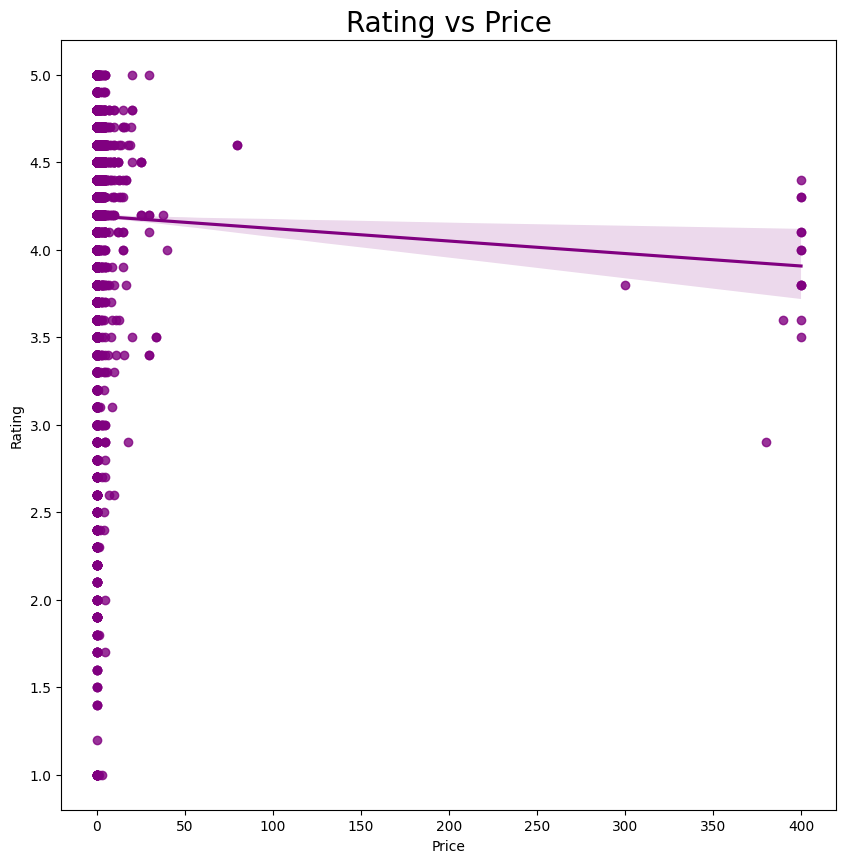

In [80]:
plt.figure(figsize=(10,10))
g=sns.regplot(x='Price',y='Rating', color='purple',data=data);
plt.title('Rating vs Price',size=20)

In [84]:
data.loc[data['Price']==0,'PriceBand']='Bedava'
data.loc[(data['Price']>0) & (data['Price']<=0.99),'PriceBand']='Ucuz'
data.loc[(data['Price']>0.99) & (data['Price']<=2.99),'PriceBand']='Ucuz Değil'
data.loc[(data['Price']>2.99) & (data['Price']<=4.99),'PriceBand']='Normal'
data.loc[(data['Price']>4.99) & (data['Price']<=14.99),'PriceBand']='Pahalı'
data.loc[(data['Price']>14.99) & (data['Price']<=29.99),'PriceBand']='Çok Pahalı'
data.loc[(data['Price']>29.99) ,'PriceBand']='Acayip'

In [85]:
data[['PriceBand','Rating']].groupby(['PriceBand'],as_index=False).mean()

,PriceBand,Rating
0,Acayip,3.923810
1,Bedava,4.186288
2,Normal,4.250318
3,Pahalı,4.269149
4,Ucuz,4.300943
5,Ucuz Değil,4.292975
6,Çok Pahalı,4.252000


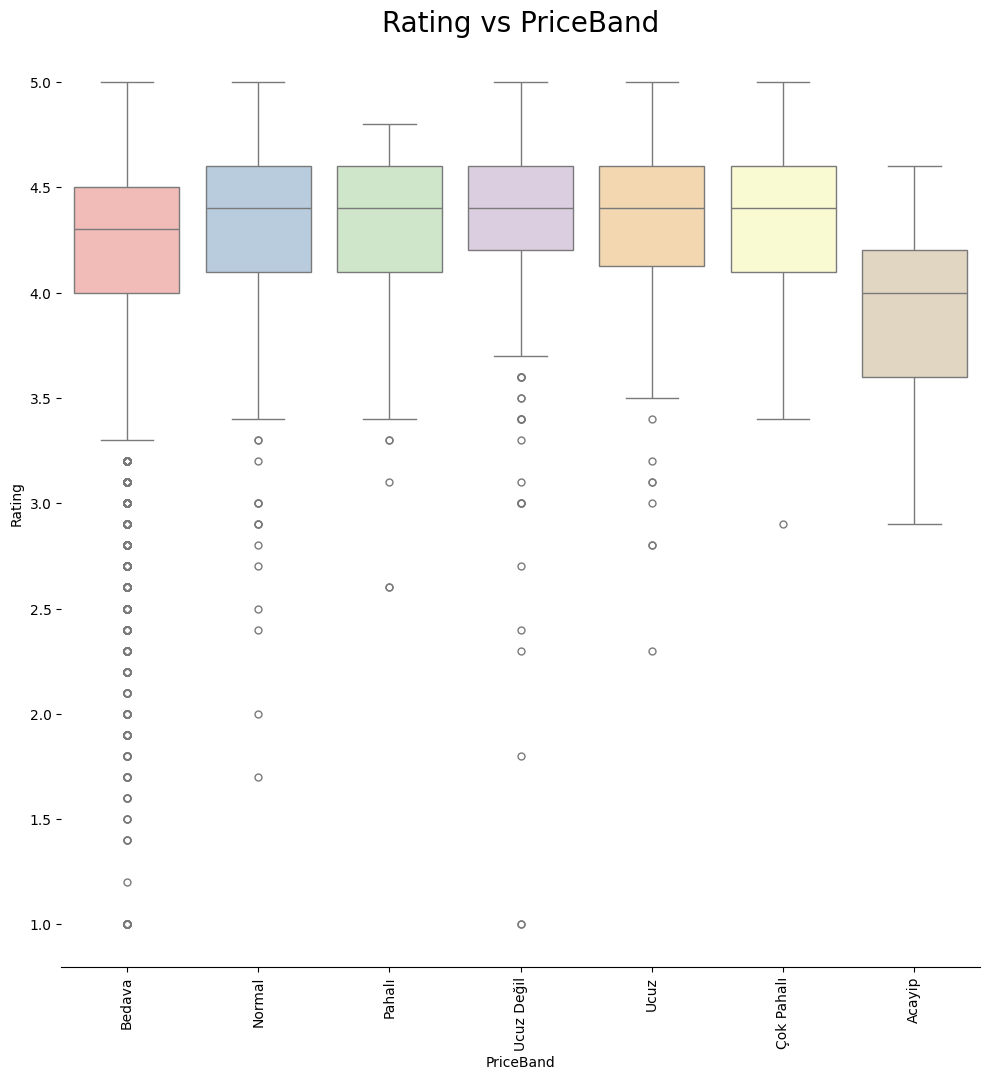

In [86]:
g=sns.catplot(x='PriceBand',y='Rating',data=data,kind='box',height=10,palette='Pastel1')
g.despine(left=True)
g.set_xticklabels(rotation=90)
g= g.set_ylabels("Rating")
plt.title("Rating vs PriceBand",size=20)
plt.show()
